In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Preprocessing

In [65]:
df.shape

(303, 14)

In [66]:
#### treating Null Values 

In [67]:
null_val = df.isnull().sum()
null_val =null_val[null_val>0]
null_val

Series([], dtype: int64)

In [68]:
df.duplicated().sum()

1

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
# Creating a copy 
df1 = df.copy()

In [71]:
df1.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

# EDA

In [72]:
# cat_col = df.dtypes[df.dtypes == 'object']
# cat_col
num_col = df.dtypes[df.dtypes != 'object'].index
num_col

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [73]:
# univarite

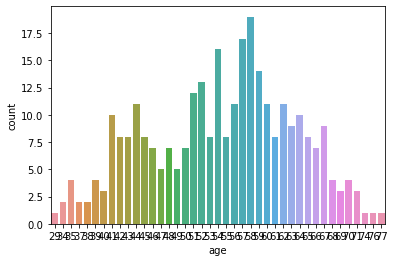

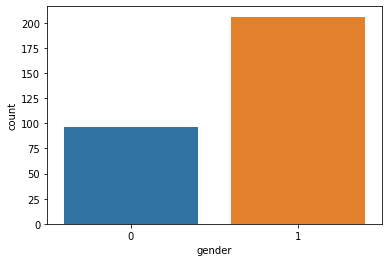

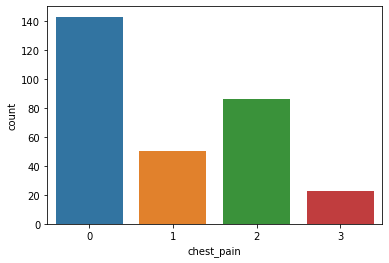

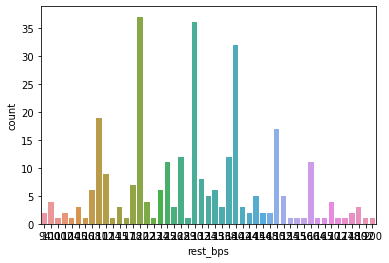

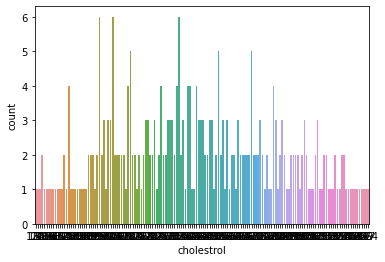

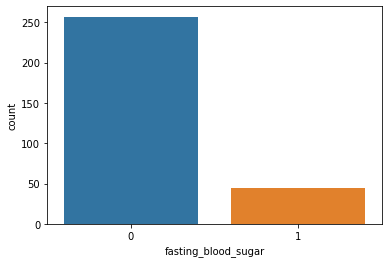

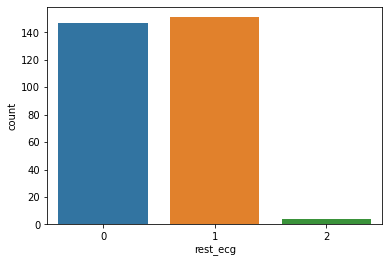

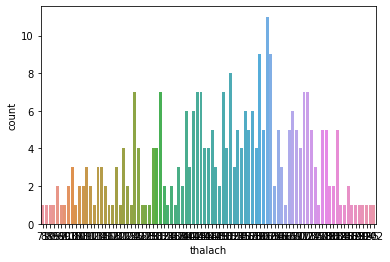

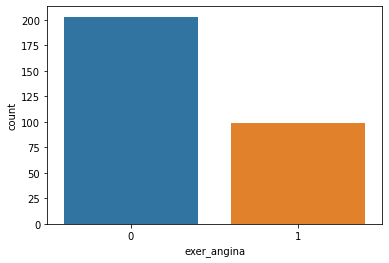

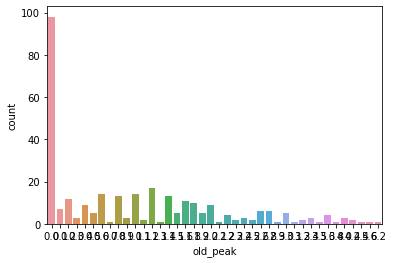

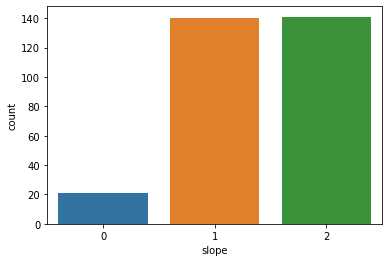

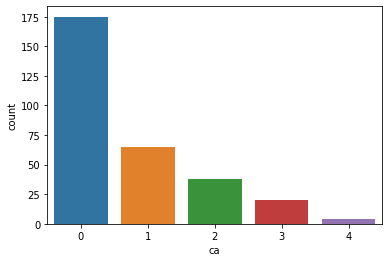

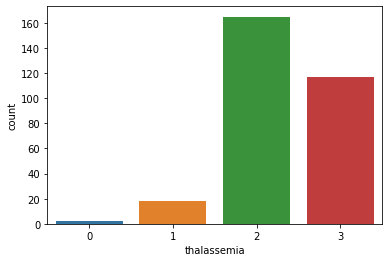

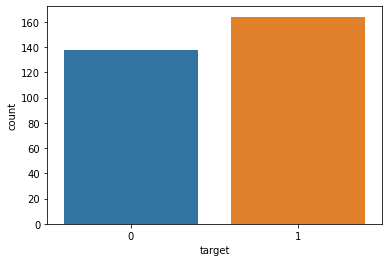

In [74]:
for i in num_col:
    sns.countplot(x = df[i])
    plt.show()

In [75]:
# Bivariate

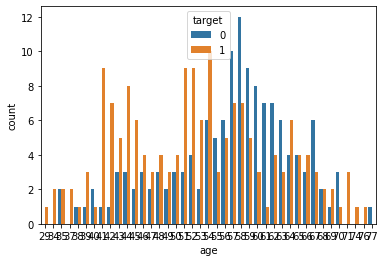

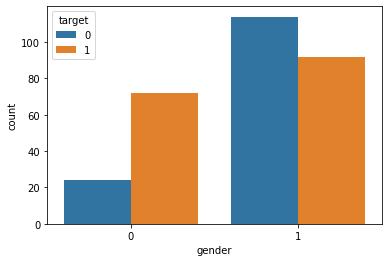

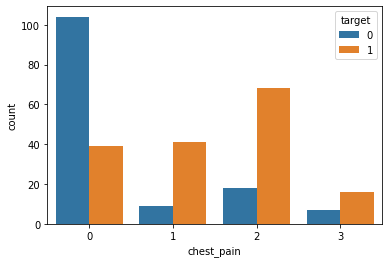

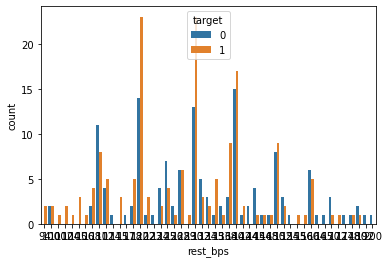

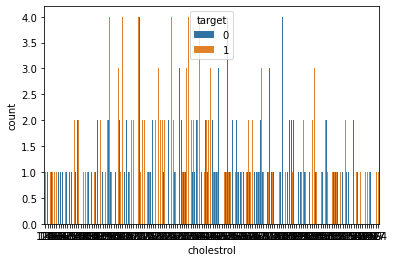

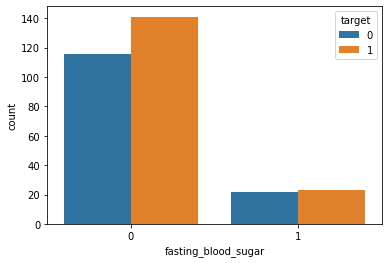

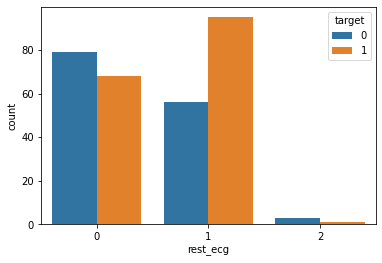

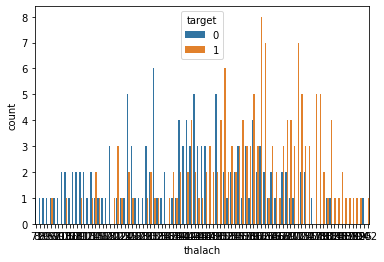

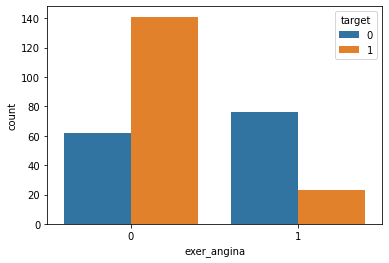

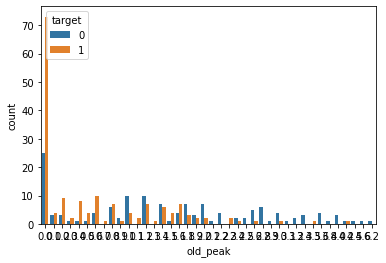

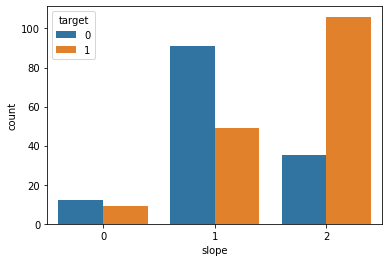

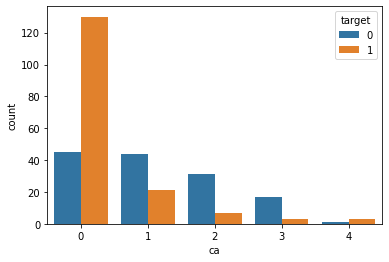

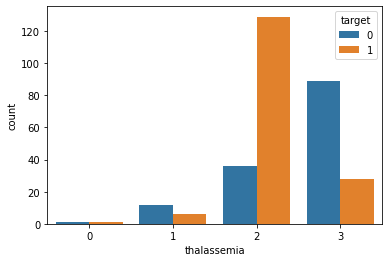

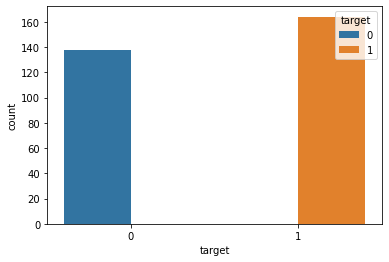

In [76]:
for i in num_col:
    sns.countplot(x = df[i],hue= df['target'])
    plt.show()

In [77]:
for i in num_col:
    print(f'{i}')
    print(df[i].value_counts())
    print(df[i].nunique)

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
<bound method IndexOpsMixin.nunique of 0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 302, dtype: int64>
gender
1    206
0     96
Name: gender, dtype: int64
<bound method IndexOpsMixin.nunique of 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: gender, Length: 302, dtype: int64>
chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64
<bound method IndexOpsMixin.nunique of 0      3
1      2
2      1
3      1
4      0
      ..
298    0
299  

In [78]:
df1.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [79]:
for i in df1.columns[[1,2,5,6,8,10,11,12]]:
    print(f'Feature: {i}')
    print(df[i].value_counts())
    print('*'*20)

Feature: gender
1    206
0     96
Name: gender, dtype: int64
********************
Feature: chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64
********************
Feature: fasting_blood_sugar
0    257
1     45
Name: fasting_blood_sugar, dtype: int64
********************
Feature: rest_ecg
1    151
0    147
2      4
Name: rest_ecg, dtype: int64
********************
Feature: exer_angina
0    203
1     99
Name: exer_angina, dtype: int64
********************
Feature: slope
2    141
1    140
0     21
Name: slope, dtype: int64
********************
Feature: ca
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
********************
Feature: thalassemia
2    165
3    117
1     18
0      2
Name: thalassemia, dtype: int64
********************


# Checking Target Variable

In [80]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

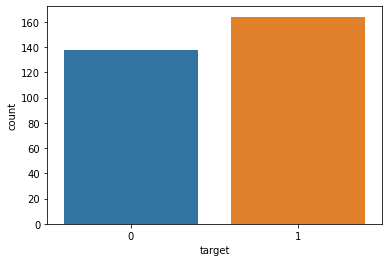

In [81]:
sns.countplot(x=df['target'])
plt.show()

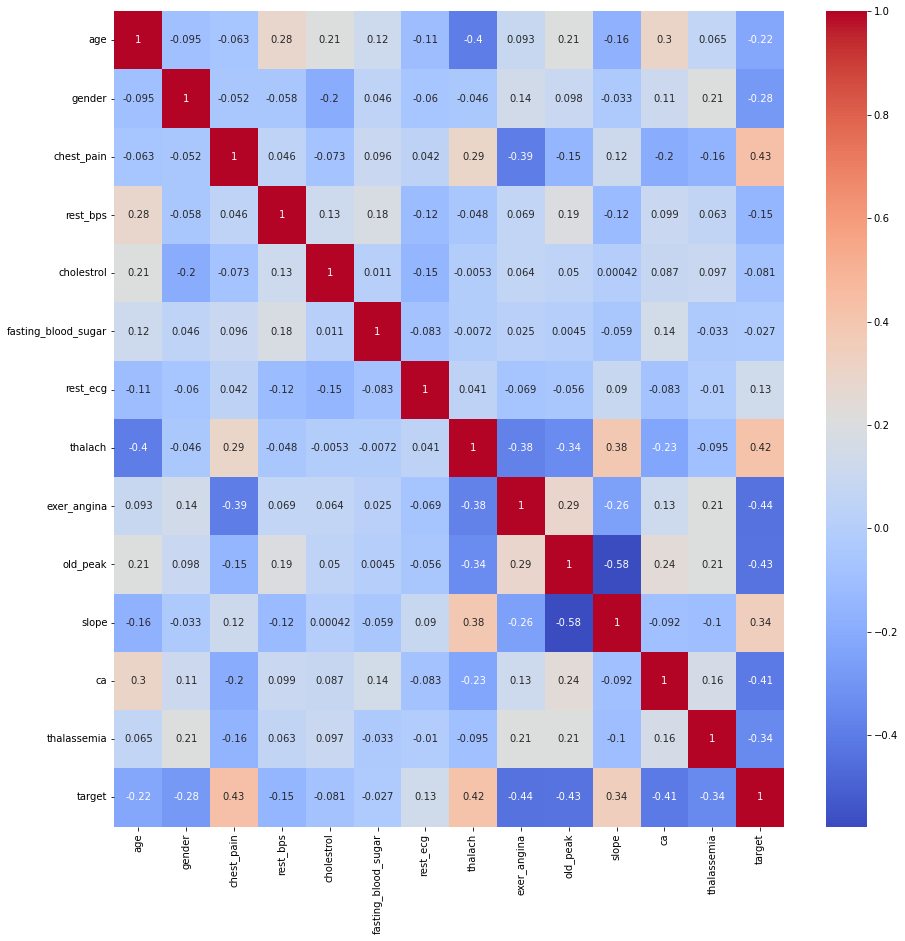

In [82]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

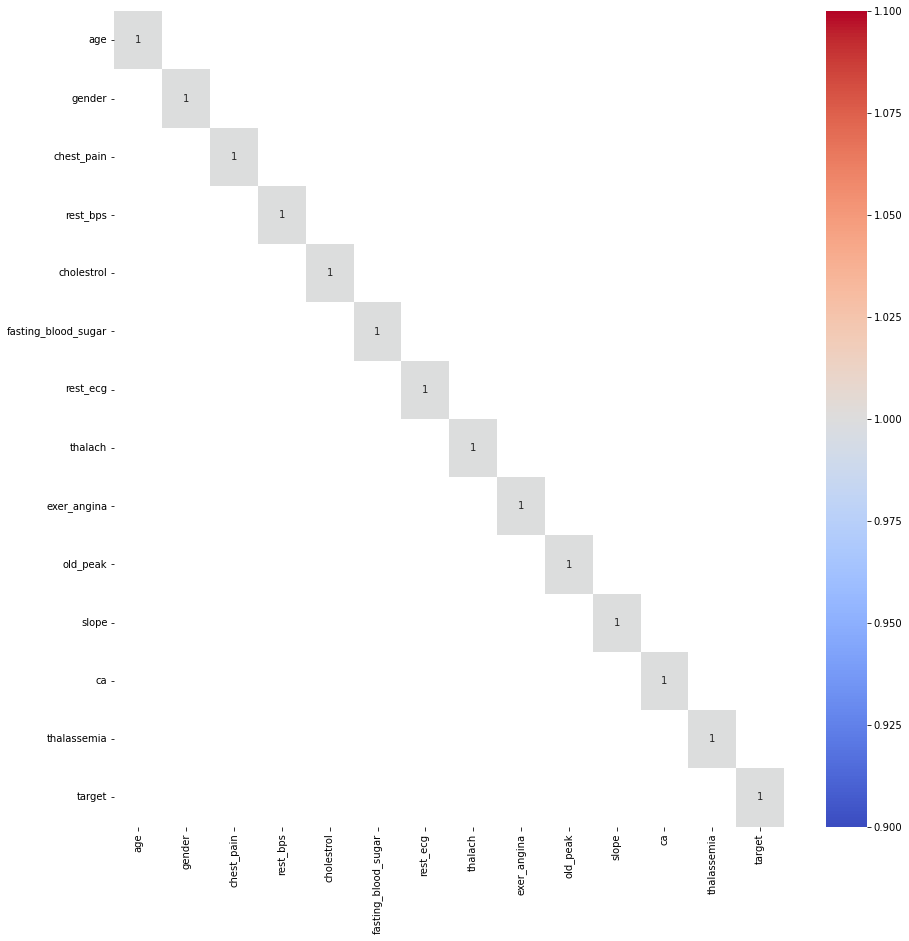

In [83]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr[corr>0.6],annot=True,cmap='coolwarm')
plt.show()

### Inference
no high correlation 

### cheacking for Outliers

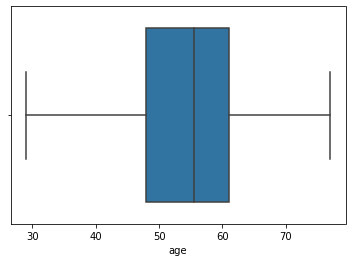

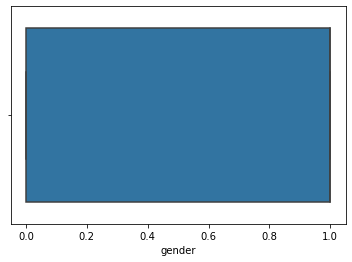

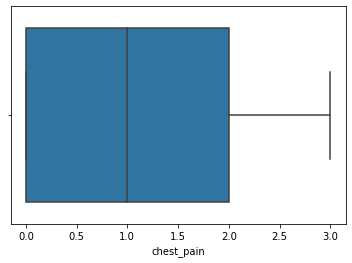

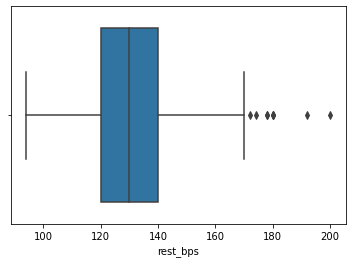

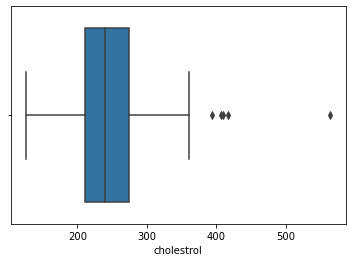

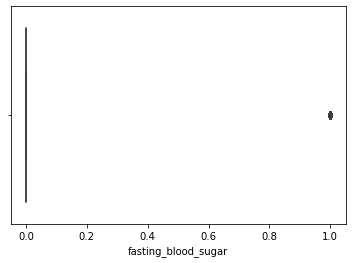

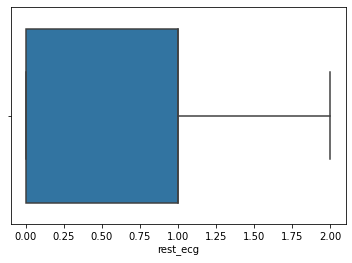

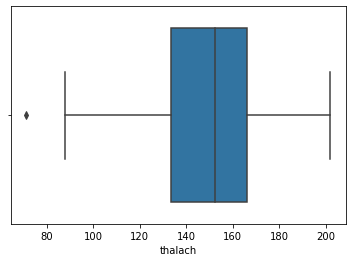

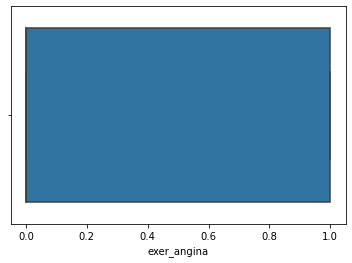

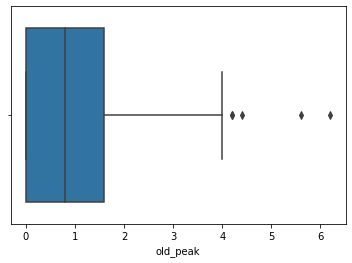

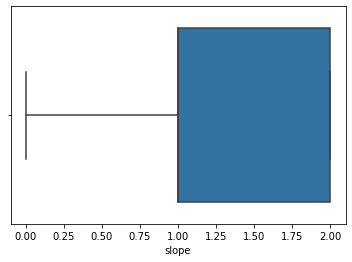

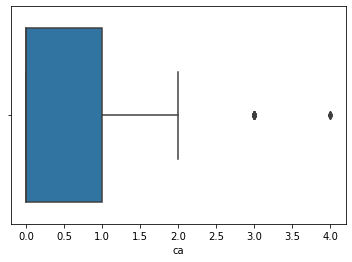

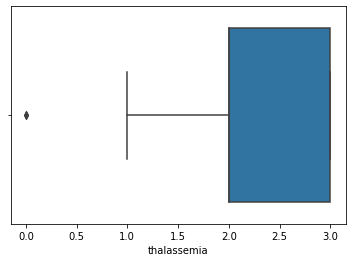

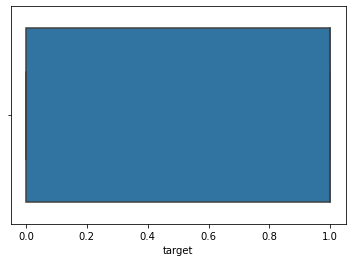

In [84]:
for i in num_col:
    sns.boxplot(x = df[i])
    plt.show()

### infrence outliers in
rest_bps,
cholestrol,
old_peak,
ca,thalach

In [85]:
df1.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
gender,302.0,0.682119,0.466426,0.0,0.00,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.00,1.0
chest_pain,302.0,0.963576,1.032044,0.0,0.00,0.00,0.00,0.00,1.0,3.00,3.00,3.00,3.00,3.0
rest_bps,302.0,131.602649,17.563394,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
fasting_blood_sugar,302.0,0.149007,0.356686,0.0,0.00,0.00,0.00,0.00,0.0,1.00,1.00,1.00,1.00,1.0
rest_ecg,302.0,0.526490,0.526027,0.0,0.00,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.99,2.0
thalach,302.0,149.569536,22.903527,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
exer_angina,302.0,0.327815,0.470196,0.0,0.00,0.00,0.00,0.00,0.0,1.00,1.00,1.00,1.00,1.0
old_peak,302.0,1.043046,1.161452,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


###### OutLier Treatment

In [86]:
print(df[df['thalach']<97.01].shape)
print(df[df['old_peak']>4.0].shape)
print(df[df['cholestrol']>353.98].shape)
print(df[df['rest_bps']>170.00].shape)
print(df[df['ca']>170.00].shape)

(7, 14)
(5, 14)
(7, 14)
(9, 14)
(0, 14)


In [87]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.97))
    x = x.clip(lower=x.quantile(0.02))
    return x

In [88]:
outlier_cols = ['rest_bps','cholestrol','thalach','old_peak']

In [89]:
df[outlier_cols] = df[outlier_cols].apply(outlier_treatment)

### Selecting Dependent(x) and Independent(y) Variable

In [90]:
df1.shape

(302, 14)

In [91]:
x = df1.drop(['target'],axis =1)
y = df1['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(302, 13)
(302,)


#### Split the data into train and test

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


#### Craete Function to compute Confusion Matrix, Classification Report

In [94]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [98]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    return res


## Appling the model

#### model -1

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [99]:
dt1 = DecisionTreeClassifier(random_state=20)  # default criterion='gini'
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)
# Highly Overfit Model

Training score 1.0
Testing score 0.8241758241758241
Predictions
 [0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
[[35  7]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [115]:
result1 = pd.DataFrame(dt1_res,index=['Base model dt1'])
result1

,Train_Score,Test_Score
Base model dt1,1.0,0.824176


In [104]:
fn = x_train.columns
cn = ['0','1']

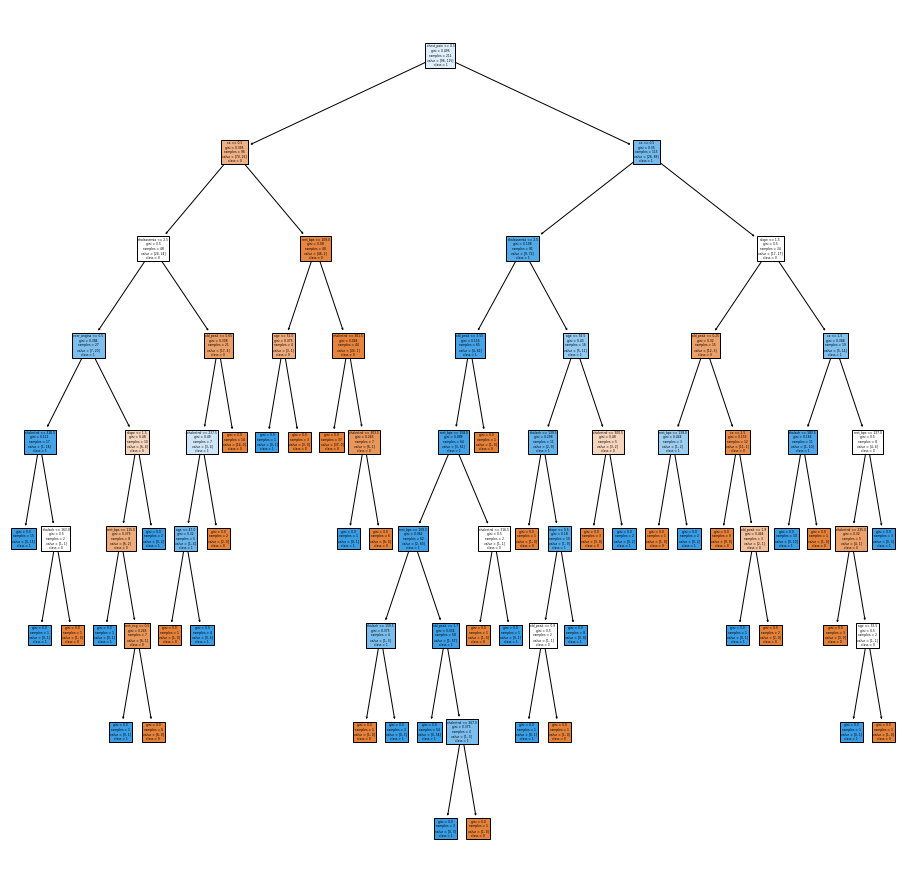

In [105]:
plt.figure(figsize=(16,16))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Model 2
with pruning

In [106]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=20)
dt2_res = model_metrics(dt2,x_train,x_test,y_train,y_test)

Training score 0.8767772511848341
Testing score 0.8021978021978022
Predictions
 [0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1]
[[33  9]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.82      0.82      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [107]:
print(dt2_res)

{'Train_Score': 0.8767772511848341, 'Test_Score': 0.8021978021978022}


In [108]:
result2 = pd.DataFrame(dt2_res,index=['DT with pruning'])
result2

,Train_Score,Test_Score
DT with pruning,0.876777,0.802198


## Model 3
pruning with entropy

In [109]:
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=25)
dt3_res = model_metrics(dt3,x_train,x_test,y_train,y_test)

Training score 0.8862559241706162
Testing score 0.8131868131868132
Predictions
 [0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1]
[[38  4]
 [13 36]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.90      0.73      0.81        49

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [110]:
result3 = pd.DataFrame(dt3_res,index=['DT with pruning(entropy)'])
result3

,Train_Score,Test_Score
DT with pruning(entropy),0.886256,0.813187


#### Logistic Reg

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)

Training score 0.8672985781990521
Testing score 0.8241758241758241
Predictions
 [0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]
[[33  9]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [113]:
result4 = pd.DataFrame(lr1_res,index=['Logistic Reg'])
result4

,Train_Score,Test_Score
Logistic Reg,0.867299,0.824176


In [116]:
res = pd.concat([result1,result2,result3,result4])
res

,Train_Score,Test_Score
Base model dt1,1.000000,0.824176
DT with pruning,0.876777,0.802198
DT with pruning(entropy),0.886256,0.813187
Logistic Reg,0.867299,0.824176


## Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score,KFold

In [118]:
# md = max_depth
md = [4,5,6,7,8,9]
kf = KFold(n_splits=7)
for i in md:
    scores = cross_val_score(DecisionTreeClassifier(max_depth=i),x_train,y_train,
                             cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg _Score at max_depth {i} is {scores.mean()}')

Scores at max_depth 4 is [0.83870968 0.7        0.76666667 0.76666667 0.73333333 0.8
 0.73333333]
Avg _Score at max_depth 4 is 0.7626728110599078
Scores at max_depth 5 is [0.80645161 0.66666667 0.83333333 0.73333333 0.73333333 0.7
 0.73333333]
Avg _Score at max_depth 5 is 0.743778801843318
Scores at max_depth 6 is [0.83870968 0.7        0.83333333 0.63333333 0.73333333 0.7
 0.66666667]
Avg _Score at max_depth 6 is 0.7293394777265745
Scores at max_depth 7 is [0.83870968 0.7        0.8        0.63333333 0.66666667 0.66666667
 0.63333333]
Avg _Score at max_depth 7 is 0.7055299539170508
Scores at max_depth 8 is [0.83870968 0.6        0.76666667 0.63333333 0.7        0.66666667
 0.63333333]
Avg _Score at max_depth 8 is 0.6912442396313365
Scores at max_depth 9 is [0.83870968 0.66666667 0.8        0.66666667 0.73333333 0.76666667
 0.7       ]
Avg _Score at max_depth 9 is 0.7388632872503841


### HyperParameter Tuning Using GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
x_train.shape

(211, 13)

In [132]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(4,12)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}

In [133]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel,param_grid=hparams_dt,cv=kf, scoring='accuracy') 
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22,
                                               24]},
             scoring='accuracy')

In [134]:
print('Best Hyperparamters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparamters
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)


In [135]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.9052132701421801
Testing score 0.7472527472527473
Predictions
 [0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1]
[[34  8]
 [15 34]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        42
           1       0.81      0.69      0.75        49

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



In [136]:
gs_model = pd.DataFrame(gs_based_res,index=['GridSearchCV with DT'])
gs_model

,Train_Score,Test_Score
GridSearchCV with DT,0.905213,0.747253


In [137]:
res = pd.concat([res,gs_model])
res

,Train_Score,Test_Score
Base model dt1,1.000000,0.824176
DT with pruning,0.876777,0.802198
DT with pruning(entropy),0.886256,0.813187
Logistic Reg,0.867299,0.824176
GridSearchCV with DT,0.905213,0.747253


### Hyperparameter Tuning with RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11], 'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22, 24]}


In [140]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
rs1 = RandomizedSearchCV(estimator=bmodel,param_distributions=hparams_dt,
                         cv=kf, scoring='accuracy') 
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              17, 20, 22, 24]},
                   scoring='accuracy')

In [141]:
print('Train Score',rs1.score(x_train,y_train))
print('Test Score',rs1.score(x_test,y_test))
print('Best Hyperparamters')
print(rs1.best_params_)
print(rs1.best_estimator_)

Train Score 0.9052132701421801
Test Score 0.7692307692307693
Best Hyperparamters
{'min_samples_split': 10, 'max_depth': 5, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)


In [142]:
rs_based_model = DecisionTreeClassifier(**rs1.best_params_)
rs_based_res = model_metrics(rs_based_model,x_train,x_test,y_train,y_test)

Training score 0.9052132701421801
Testing score 0.7692307692307693
Predictions
 [0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
[[36  6]
 [15 34]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        42
           1       0.85      0.69      0.76        49

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



In [143]:
rs_model = pd.DataFrame(rs_based_res,index=['RandomizedSearchCV with DT'])
rs_model

,Train_Score,Test_Score
RandomizedSearchCV with DT,0.905213,0.769231


In [144]:
res = pd.concat([res,rs_model])
res

,Train_Score,Test_Score
Base model dt1,1.000000,0.824176
DT with pruning,0.876777,0.802198
DT with pruning(entropy),0.886256,0.813187
Logistic Reg,0.867299,0.824176
GridSearchCV with DT,0.905213,0.747253
RandomizedSearchCV with DT,0.905213,0.769231
